In [2]:
# weight for the columns? Xinhang knows

import pandas as pd
from scipy import stats
import numpy as np

mouse_df_list = list()

# pull 16 mice PCA data
for i in range(1,17):
    df = pd.read_excel("data/micePC/PCFAnimal{}.xlsx".format(i))
    mouse_df_list.append(df)

print(len(mouse_df_list))
mouse_df_list[0]




16


,Unnamed: 0,DateTime,principal component 1,principal component 2,principal component 3
0,0,2022/11/04 14:01:00,6.232489,2.239005,-0.077610
1,1,2022/11/04 14:31:00,5.771203,2.774961,-0.517736
2,2,2022/11/04 15:01:00,5.264677,2.882661,-0.620390
3,3,2022/11/04 15:31:00,5.395691,2.807423,-0.326030
4,4,2022/11/04 16:01:00,4.400567,3.024525,0.095343
...,...,...,...,...,...
1136,1136,2022/11/28 06:01:00,-1.996426,-2.255436,-0.652635
1137,1137,2022/11/28 06:31:00,-2.992655,-1.914975,-0.135664
1138,1138,2022/11/28 07:01:00,-1.573748,-2.277790,-1.161312
1139,1139,2022/11/28 07:31:00,-0.292777,-2.574149,-1.371922


In [3]:
pc_list = list()
# get rid of first 2 columns, left with 3 PC
for i in range(len(mouse_df_list)):
    pc_list.append(mouse_df_list[i].drop(['Unnamed: 0', 'DateTime'], axis=1))

pc_list[15]


,principal component 1,principal component 2,principal component 3
0,6.148181,2.734732,-1.811059
1,4.977492,2.871511,-1.431038
2,4.785720,3.058743,-1.412793
3,4.352464,3.278941,-1.584343
4,4.622958,2.823611,-1.538344
...,...,...,...
1136,0.265944,-3.452857,-1.115030
1137,-2.690074,-2.839066,0.303815
1138,-3.411120,-2.521990,-0.598188
1139,-3.747527,-2.449111,-0.578674


In [9]:
# create mean, covariance matrix, skewness, kurtosis for each mouse, with the form (un1, un2, un3) where n is the mouse number
mean = list()
cov = list()
skew = list()
kurt = list()

for mouse in pc_list:
    # create (un1, un2, un3) for each 16 mice
    mouse_mean = []
    mouse_cov = []
    mouse_skew = []
    mouse_kurt = []

    # get individual mouse moments
    for i in range(1,4):
        column = mouse['principal component {}'.format(i)].to_numpy()
        col_moments = stats.describe(column)
        mouse_mean.append((col_moments).mean)
        mouse_cov.append((col_moments).variance)
        mouse_skew.append((col_moments).skewness)
        mouse_kurt.append((col_moments).kurtosis)

    mean.append(mouse_mean)
    cov.append(tuple(mouse_cov))
    skew.append(tuple(mouse_skew))
    kurt.append(tuple(mouse_kurt))

mean[15]

[5.97827367510689e-16, 2.2916715754576412e-15, -8.718315776197548e-16]

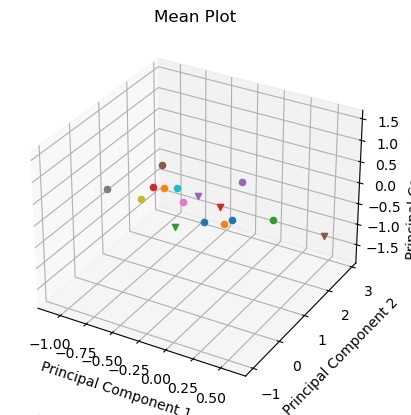

In [5]:
import matplotlib.pyplot as plt

# start plots for the moments, first mean
ax = plt.axes(projection="3d")
ax.set_title("Mean Plot")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

for i in range(len(mean)):
    if i < 12:
        ax.scatter(*mean[i])
    else:
        ax.scatter(*mean[i], marker="v")
plt.show()

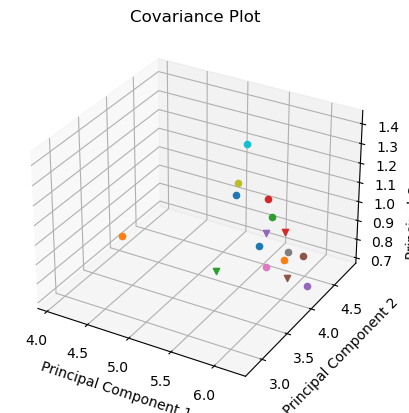

In [6]:
# cov plot
ax = plt.axes(projection="3d")
ax.set_title("Covariance Plot")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

for i in range(len(cov)):
    if i < 12:
        ax.scatter(*cov[i])
    else:
        ax.scatter(*cov[i], marker="v")
plt.show()

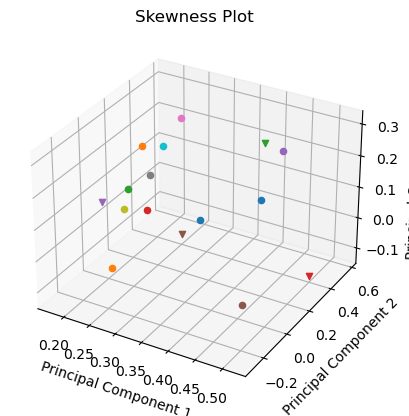

In [7]:
# skewness plot
ax = plt.axes(projection="3d")
ax.set_title("Skewness Plot")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

for i in range(len(skew)):
    if i < 12:
        ax.scatter(*skew[i])
    else:
        ax.scatter(*skew[i], marker="v")
plt.show()

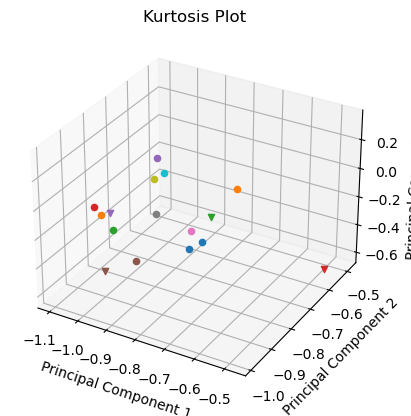

In [8]:
# kurtosis plot
ax = plt.axes(projection="3d")
ax.set_title("Kurtosis Plot")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

for i in range(len(kurt)):
    if i < 12:
        ax.scatter(*kurt[i])
    else:
        ax.scatter(*kurt[i], marker="v")
plt.show()